In [24]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import GridSearchCV  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [39]:
file_name = 'Train4.csv'
df = pd.read_csv(file_name)
test=pd.read_csv('Test2.csv')
x_test=test.values
df.head(10)

,Day,GrocerySales,season
0,1,8418.59,1
1,2,8447.47,1
2,3,8336.49,1
3,4,8579.17,1
4,5,8524.31,1
5,6,8623.50,1
6,7,8320.11,1
7,8,8313.53,1
8,9,8461.34,1
9,10,8497.24,1


In [21]:
df['season'].value_counts()
x=0
num=1
df["date"]=0
for i in df["season"]:
 
  if x!=0:
    if df["season"][x]==df["season"][x-1] or df['season'][x]==1:
     df["date"][x]=num
     num=num+1
    else:
      num=1
      df["date"][x]=num
  x=x+1

In [ ]:
dataset=df[['Day','date','season','GrocerySales']]

In [44]:
dataset.head(40)#Just to get a clear picture

,Day,date,season,GrocerySales
0,1,0,1,8418.59
1,2,1,1,8447.47
2,3,2,1,8336.49
3,4,3,1,8579.17
4,5,4,1,8524.31
5,6,5,1,8623.50
6,7,6,1,8320.11
7,8,7,1,8313.53
8,9,8,1,8461.34
9,10,9,1,8497.24


In [43]:
test.head(10)

,Day,date,season
0,693,1,1
1,694,2,1
2,695,3,1
3,696,4,1
4,697,5,1
5,698,6,1
6,699,7,1
7,700,8,1
8,701,9,1
9,702,10,1


In [32]:
x = dataset[[col for col in dataset.columns if col not in ('GrocerySales')]].values
y = dataset['GrocerySales']

In [14]:
train=dataset
target='GrocerySales'

In [ ]:
predictors = [x for x in train.columns if x not in [target]]

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
scores =cross_val_score(rf,x,y,cv=5,scoring ='neg_root_mean_squared_error')
scores.mean()

-439.9786348604698

In [73]:
a=rf.predict(x_test)

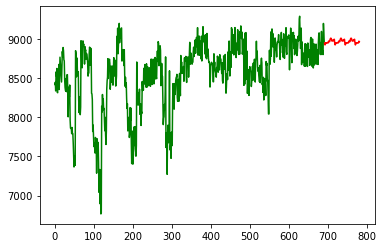

In [74]:
import matplotlib.pyplot as plt
plt.plot([X for X in range(0,692)],y,'g')
plt.plot([X for X in range(692,782)],a,'r')

In [ ]:
#though score is good the plot isnt Good

In [33]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()

In [34]:
lgb.fit(x,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
a=lgb.predict(x_test)

In [59]:
scores =cross_val_score(lgb,x,y,cv=5,scoring ='neg_root_mean_squared_error')
scores.mean()

-465.49750417079593

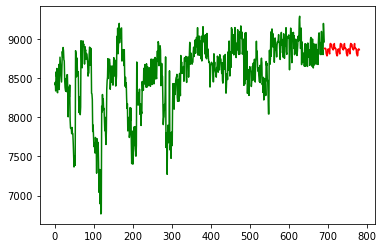

In [47]:
import matplotlib.pyplot as plt
plt.plot([X for X in range(0,692)],y,'g')
plt.plot([X for X in range(692,782)],a,'r')

In [48]:
# This LGB is acting like shit, Submitted this but no good result
#Dont just beleive the CV Alone...

In [56]:
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor(
 learning_rate =0.5,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:tweedie',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [57]:
xgb1.fit(x,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:tweedie', random_state=27, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=None)

In [50]:
a=xgb1.predict(x_test)

In [61]:
scores =cross_val_score(xgb1,x,y,cv=5,scoring ='neg_root_mean_squared_error')
scores.mean()

-485.301663183842

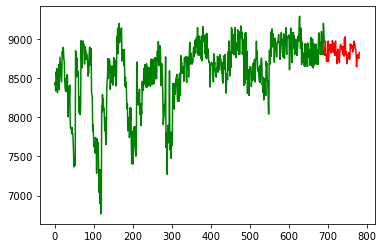

In [62]:
import matplotlib.pyplot as plt
plt.plot([X for X in range(0,692)],y,'g')
plt.plot([X for X in range(692,782)],a,'r')

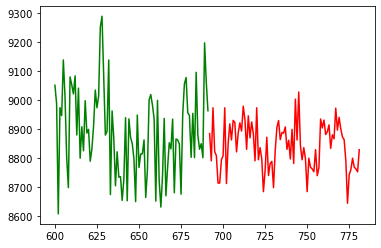

In [63]:
#Closer look
import matplotlib.pyplot as plt
plt.plot([X for X in range(600,692)],y[600:],'g')
plt.plot([X for X in range(692,782)],a,'r')

In [ ]:
#this looks fine..

In [64]:
a

array([8884.08  , 8789.895 , 8973.369 , 8821.891 , 8807.902 , 8712.861 ,
       8712.911 , 8793.231 , 8807.348 , 8973.197 , 8711.3   , 8848.179 ,
       8917.729 , 8862.146 , 8929.763 , 8922.391 , 8820.848 , 8886.368 ,
       8921.183 , 8892.93  , 8979.036 , 8931.551 , 8829.668 , 8945.548 ,
       8869.215 , 8924.313 , 8884.08  , 8789.895 , 8973.369 , 8793.416 ,
       8835.497 , 8797.006 , 8683.215 , 8756.861 , 8871.432 , 8739.108 ,
       8780.427 , 8787.883 , 8697.121 , 8824.532 , 8904.761 , 8929.269 ,
       8863.212 , 8887.725 , 8885.605 , 8907.1045, 8829.752 , 8861.064 ,
       8796.217 , 8898.631 , 8780.511 , 9003.268 , 8861.674 , 9027.857 ,
       8842.526 , 8793.416 , 8835.497 , 8797.006 , 8683.215 , 8798.852 ,
       8767.842 , 8761.807 , 8751.952 , 8828.388 , 8738.524 , 8766.003 ,
       8934.516 , 8903.47  , 8930.802 , 8880.743 , 8890.708 , 8914.191 ,
       8833.104 , 8879.862 , 8865.984 , 8972.051 , 8896.17  , 8940.346 ,
       8900.159 , 8872.515 , 8862.873 , 8790.716 , 

In [65]:
op2 = pd.DataFrame(columns = ["GrocerySales"])
op2["GrocerySales"]=a
# op2["GrocerySales"].value_counts()

In [14]:
op2.to_excel('xgb1.xlsx', index = False)